# 6章 制御系の設計仕様

In [2]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [3]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [4]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [5]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## 章末問題

----- zeta = 0.7071067811865475
peak time:  1.1101183183057821
overshoot:  0.04321379266071301
-----
tp =  1.1107207345395915
Amax =  0.0432139182637723


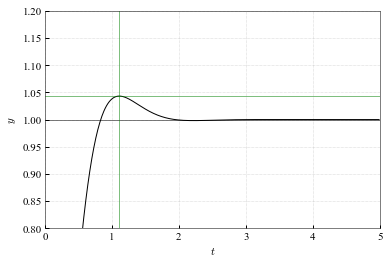

In [39]:
# 章末問題１(1)
# 最大行き過ぎ量

fig, ax = plt.subplots()

zeta = 1/np.sqrt(2)
omega_n = 4

P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y,t = step(P, np.arange(0, 5, 0.01))
    
pltargs = {'c':'k','ls': '-', 'lw':'1'}    
ax.plot(t, y, **pltargs)
    
info = stepinfo(P)
tp = np.pi/(omega_n*np.sqrt(1-zeta**2))
ymax = 1 + np.e**(-np.pi*zeta/np.sqrt(1-zeta**2))

print('----- zeta =', zeta)
print('peak time: ', info['PeakTime'])
print('overshoot: ', info['Overshoot']/100*dcgain(P))
print('-----')
print('tp = ', tp )
print('Amax = ', ymax - 1)

ax.axhline(1, color="k", linewidth=0.5)
ax.axvline(tp, color="g", linewidth=0.5)
ax.axhline(ymax, color="g", linewidth=0.5)

ax.set_xlim(0, 5)
ax.set_ylim(0.8, 1.2)
plot_set(ax, '$t$', '$y$')

----- zeta = 0.3
|y-ymax|<0.05:  2.558427881104495
Appr1: 2.5357396777413435
Appr2: 2.5


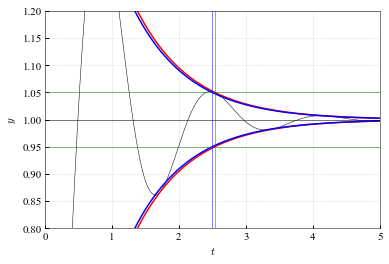

In [66]:
# 章末問題１(2)
# 5%整定時間

fig, ax = plt.subplots()

zeta = 0.3
omega_n = 4

P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y,t = step(P, np.arange(0, 5, 0.01))
    
pltargs = {'c':'k','ls': '-', 'lw':'0.5'}    
ax.plot(t, y, **pltargs)
    
info = stepinfo(P, SettlingTimeThreshold=0.05)
    
print('----- zeta =', zeta)
print('|y-ymax|<0.05: ', info['SettlingTime'])
print('Appr1:', (np.log(20/np.sqrt(1-zeta**2)))/(zeta*omega_n))
print('Appr2:', 3/(zeta*omega_n))
    
# 包絡線 Appr1：赤線
ybar1 = 1 + (1/np.sqrt(1-zeta**2))*np.e**(-zeta*omega_n*t)
ybar2 = 1 - (1/np.sqrt(1-zeta**2))*np.e**(-zeta*omega_n*t)
ax.plot(t, ybar1, c='r')
ax.plot(t, ybar2, c='r')

# 包絡線（近似）Appr2：青線
ybar1 = 1 + np.e**(-zeta*omega_n*t)
ybar2 = 1 - np.e**(-zeta*omega_n*t)
ax.plot(t, ybar1, c='b')
ax.plot(t, ybar2, c='b')

ax.axhline(1, color="k", linewidth=0.5)
ax.axhline(1.05, color="g", linewidth=0.5)
ax.axhline(0.95, color="g", linewidth=0.5)

ax.axvline( (np.log(20/np.sqrt(1-zeta**2)))/(zeta*omega_n), color="r", linewidth=0.5)
ax.axvline(3/(zeta*omega_n), color="b", linewidth=0.5)

ax.set_xlim(0, 5)
ax.set_ylim(0.8, 1.2)
plot_set(ax, '$t$', '$y$')

----- zeta = 0.3
|y-ymax|<0.02:  2.849158322139097
Appr1: 3.2993152876364724
Appr2: 3.3333333333333335


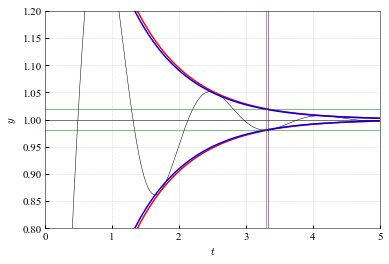

In [64]:
# 章末問題１(2)
# 2%整定時間

fig, ax = plt.subplots()

zeta = 0.3
omega_n = 4

P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y,t = step(P, np.arange(0, 5, 0.01))
    
pltargs = {'c':'k','ls': '-', 'lw':'0.5'}    
ax.plot(t, y, **pltargs)
    
info = stepinfo(P)
    
print('----- zeta =', zeta)
print('|y-ymax|<0.02: ', info['SettlingTime'])
print('Appr1:', (np.log(50/np.sqrt(1-zeta**2)))/(zeta*omega_n))
print('Appr2:', 4/(zeta*omega_n))
    
# 包絡線 Appr1：赤線
ybar1 = 1 + (1/np.sqrt(1-zeta**2))*np.e**(-zeta*omega_n*t)
ybar2 = 1 - (1/np.sqrt(1-zeta**2))*np.e**(-zeta*omega_n*t)
ax.plot(t, ybar1, c='r')
ax.plot(t, ybar2, c='r')

# 包絡線（近似） Appr2：青線
ybar1 = 1 + np.e**(-zeta*omega_n*t)
ybar2 = 1 - np.e**(-zeta*omega_n*t)
ax.plot(t, ybar1, c='b')
ax.plot(t, ybar2, c='b')

ax.axhline(1, color="k", linewidth=0.5)
ax.axhline(1.02, color="g", linewidth=0.5)
ax.axhline(0.98, color="g", linewidth=0.5)

ax.axvline((np.log(50/np.sqrt(1-zeta**2)))/(zeta*omega_n), color="r", linewidth=0.5)
ax.axvline(4/(zeta*omega_n), color="b", linewidth=0.5)

ax.set_xlim(0, 5)
ax.set_ylim(0.8, 1.2)
plot_set(ax, '$t$', '$y$')

----- zeta = 0.7071067811865475
rise time:  0.5180552152093649
-----
tr =  0.8330405509046935


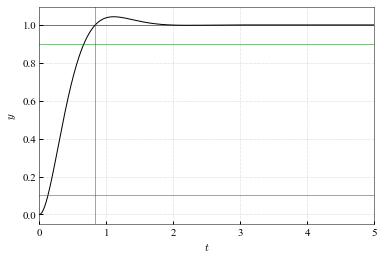

In [59]:
# 章末問題１(3)
# 立ち上がり時間

fig, ax = plt.subplots()

zeta = 1/np.sqrt(2)
omega_n = 4

P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y,t = step(P, np.arange(0, 5, 0.01))
    
pltargs = {'c':'k','ls': '-', 'lw':'1'}    
ax.plot(t, y, **pltargs)
    
info = stepinfo(P)
tr = 1/(omega_n*np.sqrt(1-zeta**2))*np.arctan2(np.sqrt(1-zeta**2),-zeta)

print('----- zeta =', zeta)
print('rise time: ', info['RiseTime'])
print('-----')
print('tr = ', tr )

ax.axhline(1, color="k", linewidth=0.5)
ax.axhline(0.9, color="g", linewidth=0.5)
ax.axhline(0.1, color="g", linewidth=0.5)
ax.axvline(tr, color="r", linewidth=0.5)

ax.set_xlim(0, 5)
plot_set(ax, '$t$', '$y$')

peak freq [rad/s]: 3.622154055254967
peak gain: 1.7471413945365304


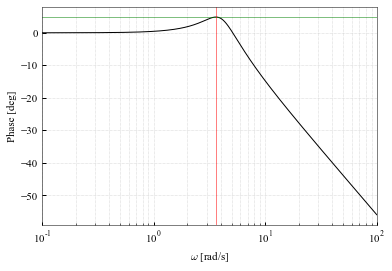

In [79]:
# 章末問題２
# ピークゲイン

fig, ax = plt.subplots()

zeta = 0.3
omega_n = 4

P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y,t = step(P, np.arange(0, 5, 0.01))

gain, phase, w = bode(P, logspace(-1,2, 1000), plot=False)
    
pltargs = {'c':'k', 'ls':'-', 'lw':'1'}
ax.semilogx(w, 20*np.log10(gain), **pltargs)

ax.grid(which="both", ls=':', lw=0.5)
ax.set_xlabel('$\omega$ [rad/s]')
ax.set_ylabel('Phase [deg]')

omega_p = omega_n * np.sqrt(1 - 2*zeta**2)
Mp = dcgain(P)/(2*zeta*np.sqrt(1-zeta**2))

ax.axhline(20*np.log10(Mp), color="g", linewidth=0.5)
ax.axvline(omega_p, color="r", linewidth=0.5)

print('peak freq [rad/s]:', omega_p)
print('peak gain:', Mp)

2% settling time:  3.9771924333533515
5% settling time:  3.0003381514770897


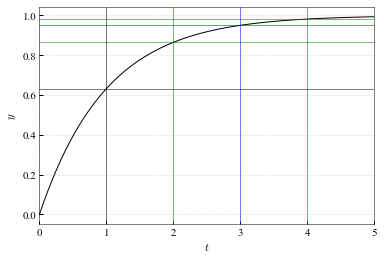

In [93]:
# 章末問題３

fig, ax = plt.subplots()

T = 1

P = tf([0, 1], [T, 1])
y,t = step(P, np.arange(0, 5, 0.01))
    
pltargs = {'c':'k','ls': '-', 'lw':'1'}    
ax.plot(t, y, **pltargs)
    
info = stepinfo(P)
print('2% settling time: ', info['SettlingTime'])
info = stepinfo(P, SettlingTimeThreshold=0.05)
print('5% settling time: ', info['SettlingTime'])

ax.axvline(T, color="k", linewidth=0.5)
ax.axhline(1-1/np.e, color="k", linewidth=0.5)

ax.axvline(2*T, color="g", linewidth=0.5)
ax.axhline(1-1/np.e**2, color="g", linewidth=0.5)

ax.axvline(3*T, color="b", linewidth=0.5)
ax.axhline(1-1/np.e**3, color="b", linewidth=0.5)

ax.axvline(4*T, color="r", linewidth=0.5)
ax.axhline(1-1/np.e**4, color="r", linewidth=0.5)

ax.set_xlim(0, 5)
plot_set(ax, '$t$', '$y$')